In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import datetime as dt
import yfinance as yf
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [2]:
model = load_model(r'C:\Users\ASUS\Desktop\Data Scientist\SPADADIKTI\Project\model.stockmarket')

Masukan Kode Currency (XXXIDR=X): EURIDR=X


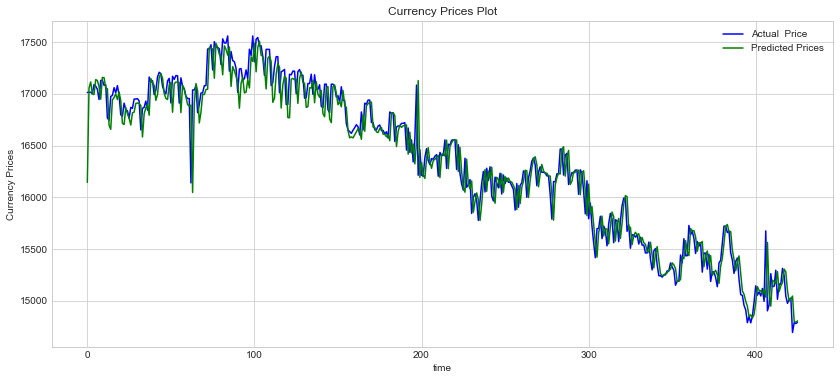

Prediction For Tomorrow: [[14822.418]]


In [3]:
#Import Data Dari YFinance
start = dt.datetime(2016,1,1) 
end = dt.datetime(2021,12,1)
currency = input("Masukan Kode Currency (XXXIDR=X): ")
df = yf.Ticker(currency) 
data = df.history(start=start, end=end)

#Scaling Data
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

#tentukan waktu prediction
prediction_days = 60
test_start=dt.datetime(2021,1,1)
test_end = dt.datetime.now()
test_data = df.history(start=test_start, end=test_end)

#Hapus Outlier
cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'] # one or more

Q1 = test_data[cols].quantile(0.25)
Q3 = test_data[cols].quantile(0.75)
IQR = Q3 - Q1
# Pada Kasus Ini Hanya Outlier Extreme yang dihapus sehingga tidak mengubah keaslian data
test_data = test_data[~((test_data[cols] < (Q1 - 3 * IQR)) |(test_data[cols] > (Q3 + 3 * IQR))).any(axis=1)]
actual_prices = test_data['Close'].values

total_dataset=pd.concat((data['Close'], test_data['Close']),axis=0)

#Menginput model
model_inputs = total_dataset[len(total_dataset)-len(test_data)- prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.fit_transform(model_inputs)

x_test = []
for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))

#Memprediksi Harga 1 Hari Kedepan
predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

#Visualisasi Test Data
plt.figure(figsize=(14,6))
plt.title("Currency Prices Plot")
plt.plot(actual_prices, color = 'blue', label = "Actual  Price")
plt.plot(predicted_prices, color='green', label="Predicted Prices")
plt.xlabel('time')
plt.ylabel('Currency Prices')
plt.legend()
plt.show()

#Hasil Prediksi
real_data = [model_inputs[len(model_inputs) - prediction_days:len(model_inputs), 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1],1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f"Prediction For Tomorrow: {prediction}")

In [61]:
real_data = [model_inputs[len(model_inputs) - prediction_days:len(model_inputs), 0]]
real_data = np.array(real_data)


In [62]:
x_test.shape

(391, 60, 1)

In [63]:
real_data.shape

(1, 60)